<a href="https://colab.research.google.com/github/MarcusTan30/Understanding_Sg_Fertility_Rate/blob/main/Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from google.colab import data_table

#Enable dataframe table
data_table.enable_dataframe_formatter()
#data_table.disable_dataframe_formatter()
#data.airports()

#mount drive
def mount_drive(folder_path):
  drive.mount('/content/gdrive', force_remount = True)
  print(folder_path)
  os.chdir(folder_path)
  return os.listdir()
#"gdrive/MyDrive/xxx/yyy/"


In [ ]:
#Change your file path here
mount_drive("gdrive/MyDrive/Application material/Applications/PMO")

Mounted at /content/gdrive
gdrive/MyDrive/Application material/Applications/PMO


['~WRL0705.tmp',
 'Population',
 'Medishield',
 '~WRL0004.tmp',
 '~WRL0003.tmp',
 'PMO Submission folder',
 'Tan_Xi_Zhi_PMO slides1.pdf',
 'Dataset.docx',
 'Tan_Xi_Zhi_PMO slides.pptx',
 'Tan_Xi_Zhi_PMO slides copy.pptx']

['15 - 19 Years' '20 - 24 Years' '25 - 29 Years' '30 - 34 Years'
 '35 - 39 Years' '40 - 44 Years' '45 - 49 Years']


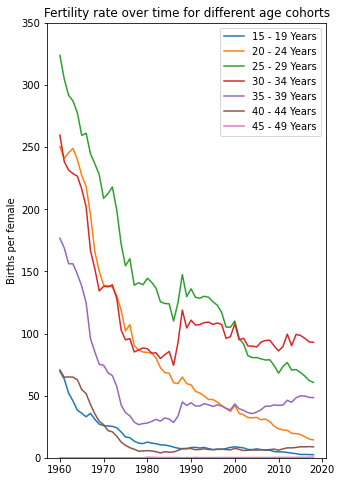

'\nplt.plot(AgeSF_Sg["year"],y, label = "line 1", linestyle="-")\nplt.plot(AgeSF_Sg["year"],y, label = "line 2", linestyle="--")\nplt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")\nplt.plot(x, np.cos(x), label = "curve 2", linestyle=":")\nplt.legend()\nplt.show()\n'

In [ ]:
#load dataset
AgeSF_Sg=pd.read_csv("age-specific-fertility-rate.csv")
#link of dataset:https://data.gov.sg/dataset/births-and-fertility-annual?view_id=28db10a5-6e78-40ba-b132-c9874d2daa78&resource_id=fd66384c-10d8-4e08-ae11-adeba09834ba

##Primary level alterations to data
AgeSF_Sg=AgeSF_Sg.rename(columns={"level_2":"Age_Group"})
#Change year to integer,and then to date
AgeSF_Sg["year"]=AgeSF_Sg["year"].astype(int)
pd.to_datetime(AgeSF_Sg.year,format='%Y')
#split the data into both data of specific age groups
AgeSF_Sg["value"] = [float(str(i).replace("na", "0")) for i in AgeSF_Sg["value"]]
AgeSF_Sg["value"]=AgeSF_Sg["value"].astype(float)
print(AgeSF_Sg["Age_Group"].unique())

##get a list of all age groups
AgeGroups=AgeSF_Sg["Age_Group"].unique()
plt.figure(figsize=(5,8))
plt.gca().invert_yaxis()

#loop through each age group
for Age in AgeGroups:
  Agegroup_placeholder=AgeSF_Sg.loc[AgeSF_Sg["Age_Group"]==Age]
  plt.plot(Agegroup_placeholder["year"],Agegroup_placeholder["value"],label=Age,linestyle="-")
#details of chart
plt.legend()
plt.ylim(ymax = 350, ymin = 0)
#tick locator
plt.title(label="Fertility rate over time for different age cohorts")
plt.ylabel('Births per female')
plt.show()

'''
plt.plot(AgeSF_Sg["year"],y, label = "line 1", linestyle="-")
plt.plot(AgeSF_Sg["year"],y, label = "line 2", linestyle="--")
plt.plot(x, np.sin(x), label = "curve 1", linestyle="-.")
plt.plot(x, np.cos(x), label = "curve 2", linestyle=":")
plt.legend()
plt.show()
'''

This cell is trying to create a difference table per year between the age groups and that of the age group 20-24 years. The reason, is to show the changes in differences over time.

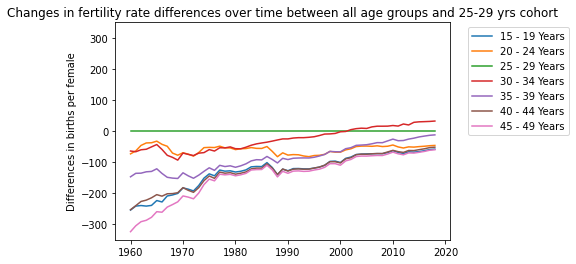

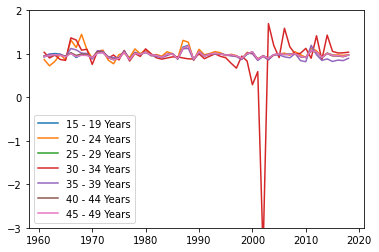

In [ ]:
#Create pivot table
AgeSF_Sg_Piv=AgeSF_Sg.pivot(index='year',columns='Age_Group', values='value')
#Creat table of: Difference between age
Difference_byAge=pd.DataFrame()
##subtract the value for all age group by that of Age 25-29 for every year
for Age in AgeGroups:
  Difference_byAge[Age]=AgeSF_Sg_Piv[Age]-AgeSF_Sg_Piv["25 - 29 Years"]
#set index
Difference_byAge=Difference_byAge.reset_index()

#plot graph of difference between age groups
for Age in AgeGroups:
  plt.plot(Difference_byAge["year"],Difference_byAge[Age],label=Age,linestyle="-")
#details of chart
plt.title(label="Changes in fertility rate differences over time between all age groups and 25-29 yrs cohort")
plt.ylabel('Differences in births per female')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim(ymax = 350, ymin = -350)
plt.show()

############################
############################
#drop age group 25-29 because difference would be zero

#Create log change
for Age in AgeGroups:
  k="Shift " + Age
  Difference_byAge[k]=Difference_byAge[Age].shift(periods=1)
  
for Age in AgeGroups:
  k="Shift " + Age
  x="Change "+ Age
  Difference_byAge[x]=Difference_byAge[Age].div(Difference_byAge[k])

for Age in AgeGroups:
  k="Shift " + Age
  Difference_byAge=Difference_byAge.drop([Age],axis=1)
  Difference_byAge=Difference_byAge.drop([k],axis=1)


#Difference_byAge=Difference_byAge.drop(["25 - 29 Years"],axis=1)

##Difference_byAge=Difference_byAge.reset_index()
																				
##Plot Data
for Age in AgeGroups:
  k="Change "+ Age
  plt.plot(Difference_byAge["year"],Difference_byAge[k],label=Age,linestyle="-")

#Drop columns regarding age group:25 - 29 Years
x="Change "+ "25 - 29 Years"
Difference_byAge=Difference_byAge.drop([x],axis=1)

#details of chart
plt.legend()
plt.ylim(ymax = 2, ymin = -3)
#tick locator
plt.show()




Create a table studying the difference between all age groups and that of 20-24 (remember to do subtract,multiply)

My attempt to log everything

In [ ]:
'''
for Age in AgeGroups:  
  AgeSF_Sg_Piv[Age] = np.log(AgeSF_Sg_Piv[Age])

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


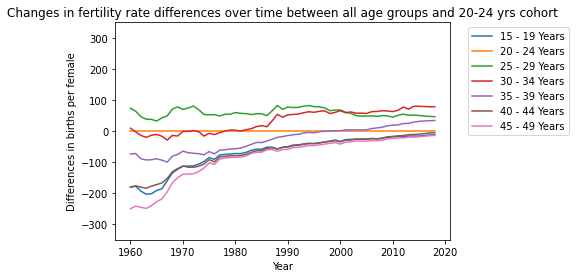

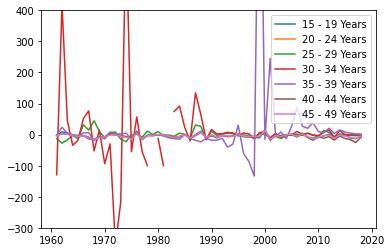

In [ ]:
Difference_byAge20_24=pd.DataFrame()
##subtract the value for all age group by that of Age 20-24 for every year
for Age in AgeGroups:
  Difference_byAge20_24[Age]=AgeSF_Sg_Piv[Age]-AgeSF_Sg_Piv["20 - 24 Years"]
#set index
Difference_byAge20_24=Difference_byAge20_24.reset_index()

#plot graph
for Age in AgeGroups:
  plt.plot(Difference_byAge20_24["year"],Difference_byAge20_24[Age],label=Age,linestyle="-")

#details of chart
plt.title(label="Changes in fertility rate differences over time between all age groups and 20-24 yrs cohort")
plt.ylabel('Differences in births per female')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim(ymax = 350, ymin = -350)
plt.show()


####
####
#Create log change
for Age in AgeGroups:
  k="Shift " + Age
  Difference_byAge20_24[k]=Difference_byAge20_24[Age].shift(periods=1)
for Age in AgeGroups:
  k="Shift " + Age
  x="Change "+ Age
  Difference_byAge20_24[x]=Difference_byAge20_24[Age].div(Difference_byAge20_24[k])
#
#Forgot to subtract and divide
for Age in AgeGroups:
  y="Returns "+ Age
  x="Change "+ Age
  Difference_byAge20_24[y]=Difference_byAge20_24[x].sub(1).mul(100)
#
for Age in AgeGroups:
  k="Shift " + Age
  x="Change "+ Age
  Difference_byAge20_24=Difference_byAge20_24.drop([Age],axis=1)
  Difference_byAge20_24=Difference_byAge20_24.drop([k],axis=1)
  Difference_byAge20_24=Difference_byAge20_24.drop([x],axis=1)

##Plot Data
for Age in AgeGroups:
  k="Returns "+ Age
  plt.plot(Difference_byAge20_24["year"],Difference_byAge20_24[k],label=Age,linestyle="-")

#Drop columns regarding age group:25 - 29 Years
x="Returns "+ "20 - 24 Years"
Difference_byAge20_24=Difference_byAge20_24.drop([x],axis=1)

#details of chart
plt.legend()
plt.ylim(ymax = 400, ymin = -300)
#tick locator
plt.show()

# Total fertility rate

Total Fertility rate

(array([1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020., 2030.]),
 <a list of 9 Text major ticklabel objects>)

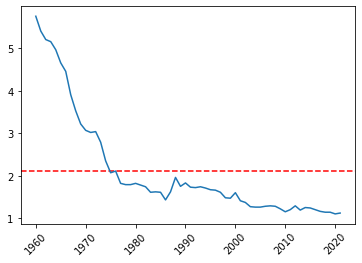

In [ ]:
TFR20=pd.read_csv("/content/gdrive/MyDrive/Application material/Applications/PMO/Population/TFR20.csv")
meltlist_TFR20=list(TFR20)
meltlist_TFR20.pop(0)
TFR20=pd.melt(TFR20,id_vars=["Data Series"],value_vars=meltlist_TFR20)
TFR20["variable"]=TFR20["variable"].astype(int)
TFR20_TotalFR=TFR20.loc[(TFR20["Data Series"]=='Total Fertility Rate (Per Female)')]
plt.axhline(y=2.1, color='r', linestyle='--')
plt.title(label="Births per female resident in Singapore")
plt.plot(TFR20_TotalFR["variable"],TFR20_TotalFR["value"])
plt.xlabel('Year')
plt.ylabel('Births per female resident')
plt.xticks(rotation=45)


# Fertility rate differences amongst different ethnicities

By Ethnicity

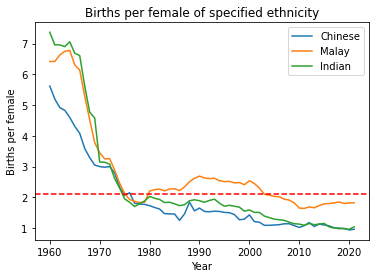

In [ ]:
TFR20=pd.read_csv("/content/gdrive/MyDrive/Application material/Applications/PMO/Population/TFR20.csv")
meltlist_TFR20=list(TFR20)
meltlist_TFR20.pop(0)
Ethnicitylist=list(TFR20["Data Series"].unique())
Ethnicitylist=Ethnicitylist[8:11]
#melt data
TFR20=pd.melt(TFR20,id_vars=["Data Series"],value_vars=meltlist_TFR20)
TFR20["variable"]=TFR20["variable"].astype(int)
TFR20_Chinese=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[0])]
TFR20_Malay=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[1])]
TFR20_Indian=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[2])]

plt.plot(TFR20_Chinese["variable"],TFR20_Chinese["value"],label="Chinese")
plt.plot(TFR20_Malay["variable"],TFR20_Malay["value"],label="Malay")
plt.plot(TFR20_Indian["variable"],TFR20_Indian["value"],label="Indian")

plt.axhline(y=2.1, color='r', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Births per female')
plt.title(label="Births per female of specified ethnicity")
plt.legend()

stacked plot chart

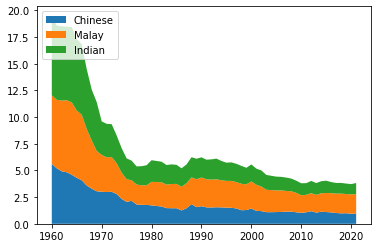

In [ ]:
TFR20=pd.read_csv("/content/gdrive/MyDrive/Application material/Applications/PMO/Population/TFR20.csv")
meltlist_TFR20=list(TFR20)
meltlist_TFR20.pop(0)
Ethnicitylist=list(TFR20["Data Series"].unique())
Ethnicitylist=Ethnicitylist[8:11]
#melt data
TFR20=pd.melt(TFR20,id_vars=["Data Series"],value_vars=meltlist_TFR20)
TFR20["variable"]=TFR20["variable"].astype(int)
TFR20["value"] = [float(str(i).replace("na", "0")) for i in TFR20["value"]]
TFR20_Chinese=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[0])]
TFR20_Malay=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[1])]
TFR20_Indian=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[2])]
#join columns
TFR20_Chinese=TFR20_Chinese.merge(TFR20_Indian[['variable','value']],on='variable',how='left',suffixes=('_Chi','_Ind'))
TFR20_Chinese=TFR20_Chinese.merge(TFR20_Malay[['variable','value']],on='variable',how='left',suffixes=('_Chi','_Mal'))

plt.stackplot(TFR20_Chinese["variable"],TFR20_Chinese["value_Chi"], TFR20_Chinese["value"],TFR20_Chinese["value_Ind"], labels=['Chinese','Malay','Indian'])
plt.legend(loc='upper left')

Changes in differences amongst ethnicities over time

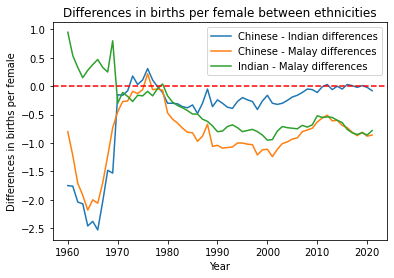

In [ ]:
#code from previous cell
TFR20=pd.read_csv("/content/gdrive/MyDrive/Application material/Applications/PMO/Population/TFR20.csv")
meltlist_TFR20=list(TFR20)
meltlist_TFR20.pop(0)
Ethnicitylist=list(TFR20["Data Series"].unique())
Ethnicitylist=Ethnicitylist[8:11]
#melt data
TFR20=pd.melt(TFR20,id_vars=["Data Series"],value_vars=meltlist_TFR20)
#ensure columns are of correct dtype
TFR20["variable"]=TFR20["variable"].astype(int)
TFR20["value"] = [float(str(i).replace("na", "0")) for i in TFR20["value"]]
#extract proper columns out of long dataframe
TFR20_Chinese=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[0])]
TFR20_Malay=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[1])]
TFR20_Indian=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[2])]

##different codes within this cell
#merge columns together (not necessary just easier to visually double check differences in table)
TFR20_Chinese=TFR20_Chinese.merge(TFR20_Indian[['variable','value']],on='variable',how='left',suffixes=('_Chi','_Ind'))
TFR20_Chinese=TFR20_Chinese.merge(TFR20_Malay[['variable','value']],on='variable',how='left',suffixes=('_Chi','_Mal'))
#calculate differences
TFR20_Chinese["C-I"]=TFR20_Chinese['value_Chi']-TFR20_Chinese['value_Ind']
TFR20_Chinese["C-M"]=TFR20_Chinese['value_Chi']-TFR20_Chinese['value']
TFR20_Chinese["I-M"]=TFR20_Chinese['value_Ind']-TFR20_Chinese['value']
  #alternative code
  #TFR20_Chinese["C-M"]=TFR20_Chinese['value']-TFR20_Malay['value']
  #TFR20_Indian["I-M"]=TFR20_Indian['value']-TFR20_Malay['value']

#plot differences 
plt.plot(TFR20_Chinese["variable"],TFR20_Chinese["C-I"],label="Chinese - Indian differences")
plt.plot(TFR20_Chinese["variable"],TFR20_Chinese["C-M"],label="Chinese - Malay differences")
plt.plot(TFR20_Chinese["variable"],TFR20_Chinese["I-M"],label="Indian - Malay differences")
plt.title(label="Differences in births per female between ethnicities")
plt.xlabel('Year')
plt.ylabel('Differences in births per female')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()

Plot differences in gaps since the 1960s

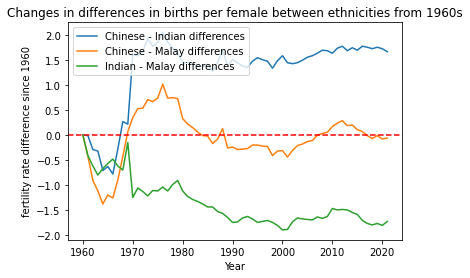

In [ ]:
#code from previous cell
TFR20=pd.read_csv("/content/gdrive/MyDrive/Application material/Applications/PMO/Population/TFR20.csv")
meltlist_TFR20=list(TFR20)
meltlist_TFR20.pop(0)
Ethnicitylist=list(TFR20["Data Series"].unique())
Ethnicitylist=Ethnicitylist[8:11]
#melt data
TFR20=pd.melt(TFR20,id_vars=["Data Series"],value_vars=meltlist_TFR20)
#ensure columns are of correct dtype
TFR20["variable"]=TFR20["variable"].astype(int)
TFR20["value"] = [float(str(i).replace("na", "0")) for i in TFR20["value"]]
#extract proper columns out of long dataframe
TFR20_Chinese=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[0])]
TFR20_Malay=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[1])]
TFR20_Indian=TFR20.loc[(TFR20["Data Series"]==Ethnicitylist[2])]

##different codes within this cell
#merge columns together (not necessary just easier to visually double check differences in table)
TFR20_Chinese=TFR20_Chinese.merge(TFR20_Indian[['variable','value']],on='variable',how='left',suffixes=('_Chi','_Ind'))
TFR20_Chinese=TFR20_Chinese.merge(TFR20_Malay[['variable','value']],on='variable',how='left',suffixes=('_Chi','_Mal'))
#calculate differences
TFR20_Chinese["C-I"]=TFR20_Chinese['value_Chi']-TFR20_Chinese['value_Ind']
TFR20_Chinese["C-M"]=TFR20_Chinese['value_Chi']-TFR20_Chinese['value']
TFR20_Chinese["I-M"]=TFR20_Chinese['value_Ind']-TFR20_Chinese['value']


#calculate difference changes from 1960
TFR20_Chinese["C-I_1960"]=TFR20_Chinese['C-I']-TFR20_Chinese['C-I'][61]
TFR20_Chinese["C-M_1960"]=TFR20_Chinese['C-M']-TFR20_Chinese['C-M'][61]
TFR20_Chinese["I-M_1960"]=TFR20_Chinese['I-M']-TFR20_Chinese['I-M'][61]

  #alternative code
  #TFR20_Chinese["C-M"]=TFR20_Chinese['value']-TFR20_Malay['value']
  #TFR20_Indian["I-M"]=TFR20_Indian['value']-TFR20_Malay['value']

#plot differences 
plt.plot(TFR20_Chinese["variable"],TFR20_Chinese["C-I_1960"],label="Chinese - Indian differences")
plt.plot(TFR20_Chinese["variable"],TFR20_Chinese["C-M_1960"],label="Chinese - Malay differences")
plt.plot(TFR20_Chinese["variable"],TFR20_Chinese["I-M_1960"],label="Indian - Malay differences")
plt.title(label="Changes in differences in births per female between ethnicities from 1960s")
plt.xlabel('Year')
plt.ylabel('fertility rate difference since 1960')
plt.axhline(y=0, color='r', linestyle='--')
plt.legend()
#view data
#data_table.enable_dataframe_formatter()
#TFR20_Chinese

Fertility rate changes since 1960s


 
#Population level

In [ ]:
EducPop=pd.read_csv("/content/gdrive/MyDrive/Application material/Applications/PMO/PMO Submission folder/Clean dataset/Edupop.csv")
